## Comparion US/Canada level 1 

Testing Changes in before and after application of `geoplanar`.

In [2]:
import geoplanar
import geopandas as gpd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal
from libpysal.weights import Queen, Rook
import pandas


In [3]:
raw = gpd.read_parquet("raw_us_candas.parquet")
raw.head()

,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",...,None,None,None,None,None,None,None,None,None,None
1,1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",...,None,None,None,None,None,None,None,None,None,None
2,2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",...,None,None,None,None,None,None,None,None,None,None
3,3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",...,None,None,None,None,None,None,None,None,None,None
4,4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",...,None,None,None,None,None,None,None,None,None,None


In [4]:
clean = gpd.read_parquet("clean_1.parquet")
clean.head()

,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.45316 48.12867, -122.3600...",...,None,None,None,None,None,None,None,None,None,None
1,1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.45853 44.53800, -111.48178 44.5...",...,None,None,None,None,None,None,None,None,None,None
2,2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-68.23925 44.43748, -68.16531 ...",...,None,None,None,None,None,None,None,None,None,None
3,3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-99.00645 45.93958, -99.71695 45.942...",...,None,None,None,None,None,None,None,None,None,None
4,4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-104.05899 43.85293, -104.05924 44.1...",...,None,None,None,None,None,None,None,None,None,None


<AxesSubplot:>

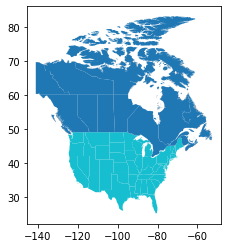

In [5]:
raw.plot("COUNTRY")

<AxesSubplot:>

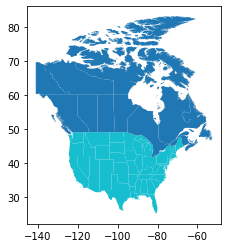

In [6]:
clean.plot("COUNTRY")

In [7]:
raw_cen= raw.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/4080139124.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  raw_cen= raw.centroid


<AxesSubplot:>

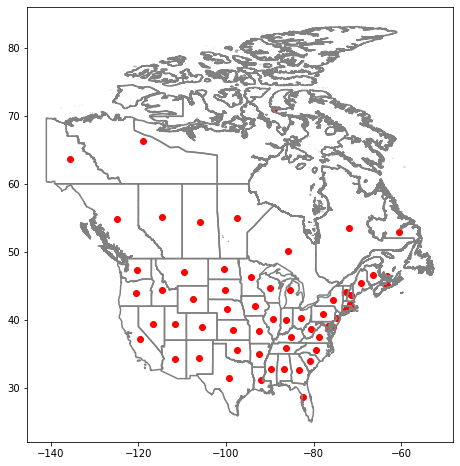

In [8]:
base = raw.geometry.boundary.plot(edgecolor='grey', figsize=(15, 8))
raw_cen.plot(ax=base, color='red')


In [9]:
clean_cen= clean.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/2798404558.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clean_cen= clean.centroid


In [10]:
c= clean.geometry
c.head()

0    MULTIPOLYGON (((-122.45316 48.12867, -122.3600...
1    POLYGON ((-111.45853 44.53800, -111.48178 44.5...
2    MULTIPOLYGON (((-68.23925 44.43748, -68.16531 ...
3    POLYGON ((-99.00645 45.93958, -99.71695 45.942...
4    POLYGON ((-104.05899 43.85293, -104.05924 44.1...
Name: geometry, dtype: geometry

In [11]:
clean_cen.head() # centroids are points

0    POINT (-120.42679 47.37697)
1    POINT (-109.65179 47.03229)
2     POINT (-69.23741 45.39074)
3    POINT (-100.47113 47.44637)
4    POINT (-100.23487 44.43333)
dtype: geometry

<AxesSubplot:>

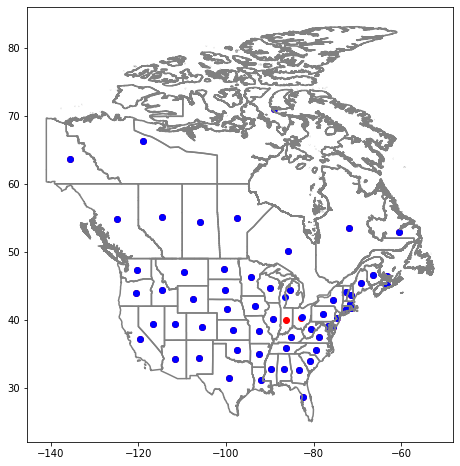

In [12]:

base =clean.geometry.boundary.plot(edgecolor='grey', figsize=(15, 8))
raw_cen.plot(ax=base, color='red')
clean_cen.plot(ax=base, color='blue')


The red dots show the centroid of the nonplanar enforced data (called raw) and the blue points show the centroid with planar enforcement (clean data).

### Centriod Alignment

In [13]:
# all centroid points geometries that equal aligned other to a given tolerance, else False.
raw_cen.geometry.geom_equals_exact(clean_cen.geometry, tolerance=.01).sum()

58

### Geometry Alignment

In [22]:
# all geometries that equal aligned other to a given tolerance, else False.
raw.geometry.geom_equals_exact(clean.geometry, tolerance=.02).sum()

9

In [16]:
equal= raw_cen.geom_equals(clean_cen.geometry, align=False)

In [18]:
equal

0     False
1     False
2     False
3     False
4     False
      ...  
56    False
57     True
58    False
59    False
60     True
Length: 61, dtype: bool

### Subset for Ohio a Polygon

In [23]:
Ohio_raw = raw[raw.STATE_NAME=="Ohio"] 

In [24]:
Ohio_clean = clean[clean.STATE_NAME=="Ohio"] 

In [25]:
Ohio_clean.geometry

24    POLYGON ((-83.50016 38.69006, -83.52664 38.696...
Name: geometry, dtype: geometry

In [26]:
Ohio_raw.geometry

24    POLYGON ((-83.27285 38.60918, -83.29014 38.596...
Name: geometry, dtype: geometry

In [27]:
Ohio_clean_centroid= Ohio_clean.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/3126960989.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Ohio_clean_centroid= Ohio_clean.centroid


In [28]:
Ohio_raw_centroid= Ohio_raw.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/617606723.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Ohio_raw_centroid= Ohio_raw.centroid


<AxesSubplot:>

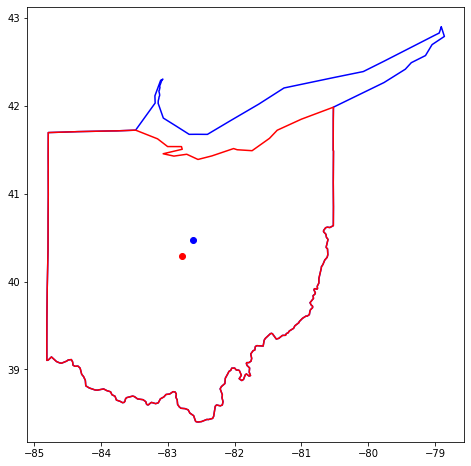

In [29]:
base =Ohio_clean.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
Ohio_raw.geometry.boundary.plot(ax=base, color='red')
Ohio_raw_centroid.plot(ax=base, color='red')
Ohio_clean_centroid.plot(ax=base, color='blue')

The red color represents the geometries for Ohio in the non-planar enforced data(raw) and the blue represents the planar enforced data (cleand). Since Ohio is situated near the lakes by using geoplanar on the US/Canada data we are enlarging the boundaries as a result the centroid also moves north. 

In [30]:
Ohio_raw.geometry.geom_equals(Ohio_clean.geometry)

24    False
dtype: bool

### Subset for Michigan a Multipolygon

In [31]:
M_raw = raw[raw.STATE_NAME=="Michigan"] 

In [32]:
M_clean = clean[clean.STATE_NAME=="Michigan"] 

In [33]:
M_clean.geometry

47    MULTIPOLYGON (((-82.47028 42.78082, -82.46694 ...
Name: geometry, dtype: geometry

In [34]:
M_raw.geometry

47    MULTIPOLYGON (((-88.49746 48.17392, -88.62525 ...
Name: geometry, dtype: geometry

In [35]:
M_clean_centroid= M_clean.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/3779043813.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  M_clean_centroid= M_clean.centroid


In [36]:
M_raw_centroid= M_raw.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/35541693.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  M_raw_centroid= M_raw.centroid


<AxesSubplot:>

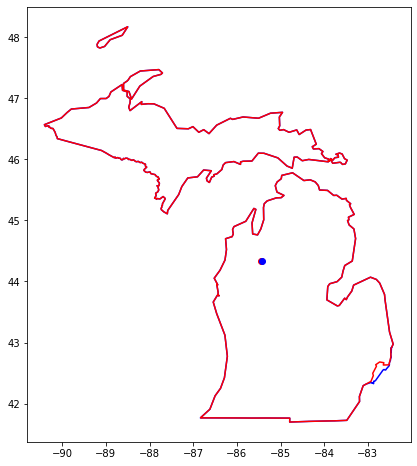

In [37]:
base =M_clean.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
M_raw.geometry.boundary.plot(ax=base, color='red')
M_raw_centroid.plot(ax=base, color='red')
M_clean_centroid.plot(ax=base, color='blue')

In [42]:
M_raw.geometry.geom_equals(M_clean.geometry)

47    False
dtype: bool

In [43]:
M_raw.area

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/187215084.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  M_raw.area


47    16.927959
dtype: float64

In [44]:
M_clean.area

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/547189804.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  M_clean.area


47    16.987128
dtype: float64

## Subset for Indiana

In [38]:
I_raw = raw[raw.STATE_NAME=="Indiana"] 

In [39]:
I_clean = clean[clean.STATE_NAME=="Indiana"] 

In [40]:
I_clean.geometry

20    POLYGON ((-86.36437 38.19323, -86.38833 38.194...
Name: geometry, dtype: geometry

In [41]:
I_raw.geometry

20    POLYGON ((-86.34163 38.17722, -86.36437 38.193...
Name: geometry, dtype: geometry

In [45]:
I_clean_centroid= I_clean.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/3056982971.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  I_clean_centroid= I_clean.centroid


In [46]:
I_raw_centroid= I_raw.centroid

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/1942016553.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  I_raw_centroid= I_raw.centroid


<AxesSubplot:>

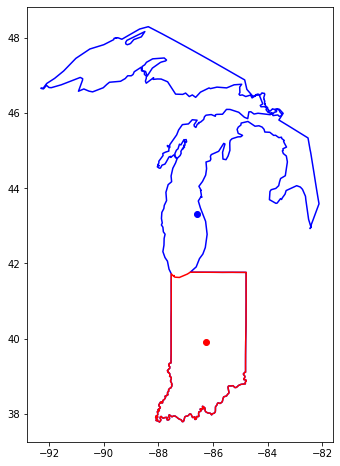

In [47]:
base =I_clean.geometry.boundary.plot(edgecolor='blue', figsize=(15, 8))
I_raw.geometry.boundary.plot(ax=base, color='red')
I_raw_centroid.plot(ax=base, color='red')
I_clean_centroid.plot(ax=base, color='blue')

The example of Indiana illustrates the limitation of `geoplanar`.

In [48]:
I_raw.area

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/3462769349.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  I_raw.area


20    9.931907
dtype: float64

In [49]:
I_clean.area

/var/folders/bm/9_7n6xk57ls2kh_wc5c31_km0000gq/T/ipykernel_1244/3271424619.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  I_clean.area


20    25.475881
dtype: float64